In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# IPython.display.Audio lets you play audio directly in an IPython notebook.
from IPython import display as ipd
ipd.Audio("/kaggle/input/freesound-audio-tagging/audio_train/3707da71.wav")#,rate=22050) 
# rate : The sampling rate of the raw data
# 샘플링 레이트(영어: sampling rate) 또는 샘플링 주파수(영어: sampling frequency)는 이산적인 신호를 만들기 위해 
# 연속적 신호에서 얻어진 단위시간(주로 초)당 샘플링 횟수를 정의한다. 단위는 헤르츠(역수 초, 1/s, s−1)이다.

# In music, sampling is the reuse of a portion of a sound recording in another recording.
# Samples may comprise elements such as rhythm, melody, speech, sounds, or entire bars of music.

# 음악의 3요소: 리듬(장단강약), 멜로디(고저), 하모니(화음)
# 리듬이란 길고 짧은 음과 셈여림의 시간적 조합된 것을 뜻한다. 넓은 의미에서의 리듬은 음의 시간, 속도 , 악센트, 형태 등의 4 가지 요소가 있다
# 멜로디(선율)이란 리듬을 바탕으로 한 음의 높낮이의 시간적 진행을 말한다.



In [ ]:
# 개념 정리
# 신호는 시간에 따라 일정한 양의 변화량이다. 오디오의 경우 변하는 양은 기압(진폭)입니다.
# 시간이 지남에 따라 공기압 샘플을 채취 할 수 있습니다. 우리가 캡처 한 것은 신호에 대한 파형입니다.

# 오디오 신호 샘플을 수집 할 때 우린 결과 진폭 만 캡처합니다. 그런데 이 진폭은 여러 개의 단일 주파수 음파로 구성됩니다.
# '푸리에 변환'은 우리가 각각의 주파수의 주파수의 진폭으로 신호를 분해 할 수있는 수학 식이다. 즉, 시간 도메인의 신호를 주파수 도메인으로 변환합니다.
# 그 결과를 '스펙트럼' 이라고합니다.

# 고속 푸리에 변환(FFT)은 효율적으로 푸리에 변환을 계산할 수있는 알고리즘입니다. 신호 처리에 널리 사용됩니다.
# 

고속 푸리에 변환은 신호의 주파수 성분을 분석 할 수있는 강력한 도구입니다. 그러나 신호의 주파수 성분이 시간에 따라 변하면 어떻게 될까요? 음악 및 음성과 같은 대부분의 오디오 신호에 해당합니다. 이러한 신호를 비 주기적 신호라고합니다. 시간이 지남에 따라 달라지는 이러한 신호의 스펙트럼을 나타내는 방법이 필요합니다. "이봐, 신호의 여러 창 세그먼트에서 FFT를 수행하여 여러 스펙트럼을 계산할 수 없습니까?"라고 생각할 수 있습니다. 예! 이것이 정확히 수행되는 작업이며이를 단시간 푸리에 변환 이라고합니다 . FFT는 신호의 겹치는 윈도우 세그먼트에서 계산되며 스펙트로 그램 이라고하는 것을 얻습니다 .

스펙트로 그램은 서로의 위에 쌓인 FFT 묶음으로 생각할 수 있습니다. 신호의 크기 또는 진폭을 시각적으로 표현하는 방법입니다. 시간이 지남에 따라 다른 주파수에서 달라지기 때문입니다. 스펙트로 그램을 계산할 때 뒤에서 진행되는 몇 가지 추가 세부 사항이 있습니다. y 축은 로그 스케일로 변환되고 색상 차원은 데시벨로 변환됩니다 (이를 진폭의 로그 스케일로 생각할 수 있음). 인간은 매우 작고 집중된 주파수 및 진폭 범위 만 인식 할 수 있기 때문입니다.

연구에 따르면 인간은 선형 척도로 주파수를 인식하지 못합니다. 우리는 높은 주파수보다 낮은 주파수의 차이를 더 잘 감지합니다. 예를 들어 500Hz와 1000Hz 사이의 차이를 쉽게 구분할 수 있지만 두 쌍 사이의 거리가 동일하더라도 10,000Hz와 10,500Hz 사이의 차이는 거의 구분할 수 없습니다.

1937 년에 Stevens, Volkmann 및 Newmann은 음정의 동일한 거리가 청취자에게 똑같이 먼 거리에서 들리도록 음조 단위를 제안했습니다. 이것을 멜 스케일 이라고합니다 . 우리는 주파수를 수학적 연산을 수행하여 멜 스케일로 변환합니다.

In [ ]:
# MEL 스펙트로는 주파수가 멜 스케일로 변환되는 스펙트로 그램입니다.

In [ ]:
# Load an audio file as a floating point time series.
# Audio will be automatically resampled to the given rate (default sr=22050).
# Use librosa.load to load an audio file into an audio array. Return both the audio array as well as the sample rate
import librosa
audio, sr = librosa.load("/kaggle/input/freesound-audio-tagging/audio_train/3707da71.wav")

In [ ]:
# Check the length of the audio array and sample rate
print(audio.shape)
print(sr) # sample rate : 1초당 샘플링 횟수

In [ ]:
# 195363 / 22050 = 8.86 초

In [ ]:
audio

In [ ]:
import matplotlib.pyplot as plt
plt.plot(audio)

In [ ]:
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio, sr=sr)

In [ ]:
# Short-time Fourier transform (STFT).
# The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT)
# over short overlapping windows.

In [ ]:
# librosa.stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=None, pad_mode='reflect')
# n_fft : 
# length of the windowed signal after padding with zeros. The number of rows in the STFT matrix D is (1 + n_fft/2). 
# The default value, n_fft=2048 samples, corresponds to a physical duration of 93 milliseconds at a sample rate of 22050 Hz,
# i.e. the default sample rate in librosa. This value is well adapted for music signals. However, in speech processing,
# the recommended value is 512, corresponding to 23 milliseconds at a sample rate of 22050 Hz.
# In any case, we recommend setting n_fft to a power of two for optimizing the speed of the fast Fourier transform (FFT)
# algorithm.

# hop_length : 
# number of audio samples between adjacent STFT columns.

# win_length : 
# Each frame of audio is windowed by window of length win_length and then padded with zeros to match n_fft.

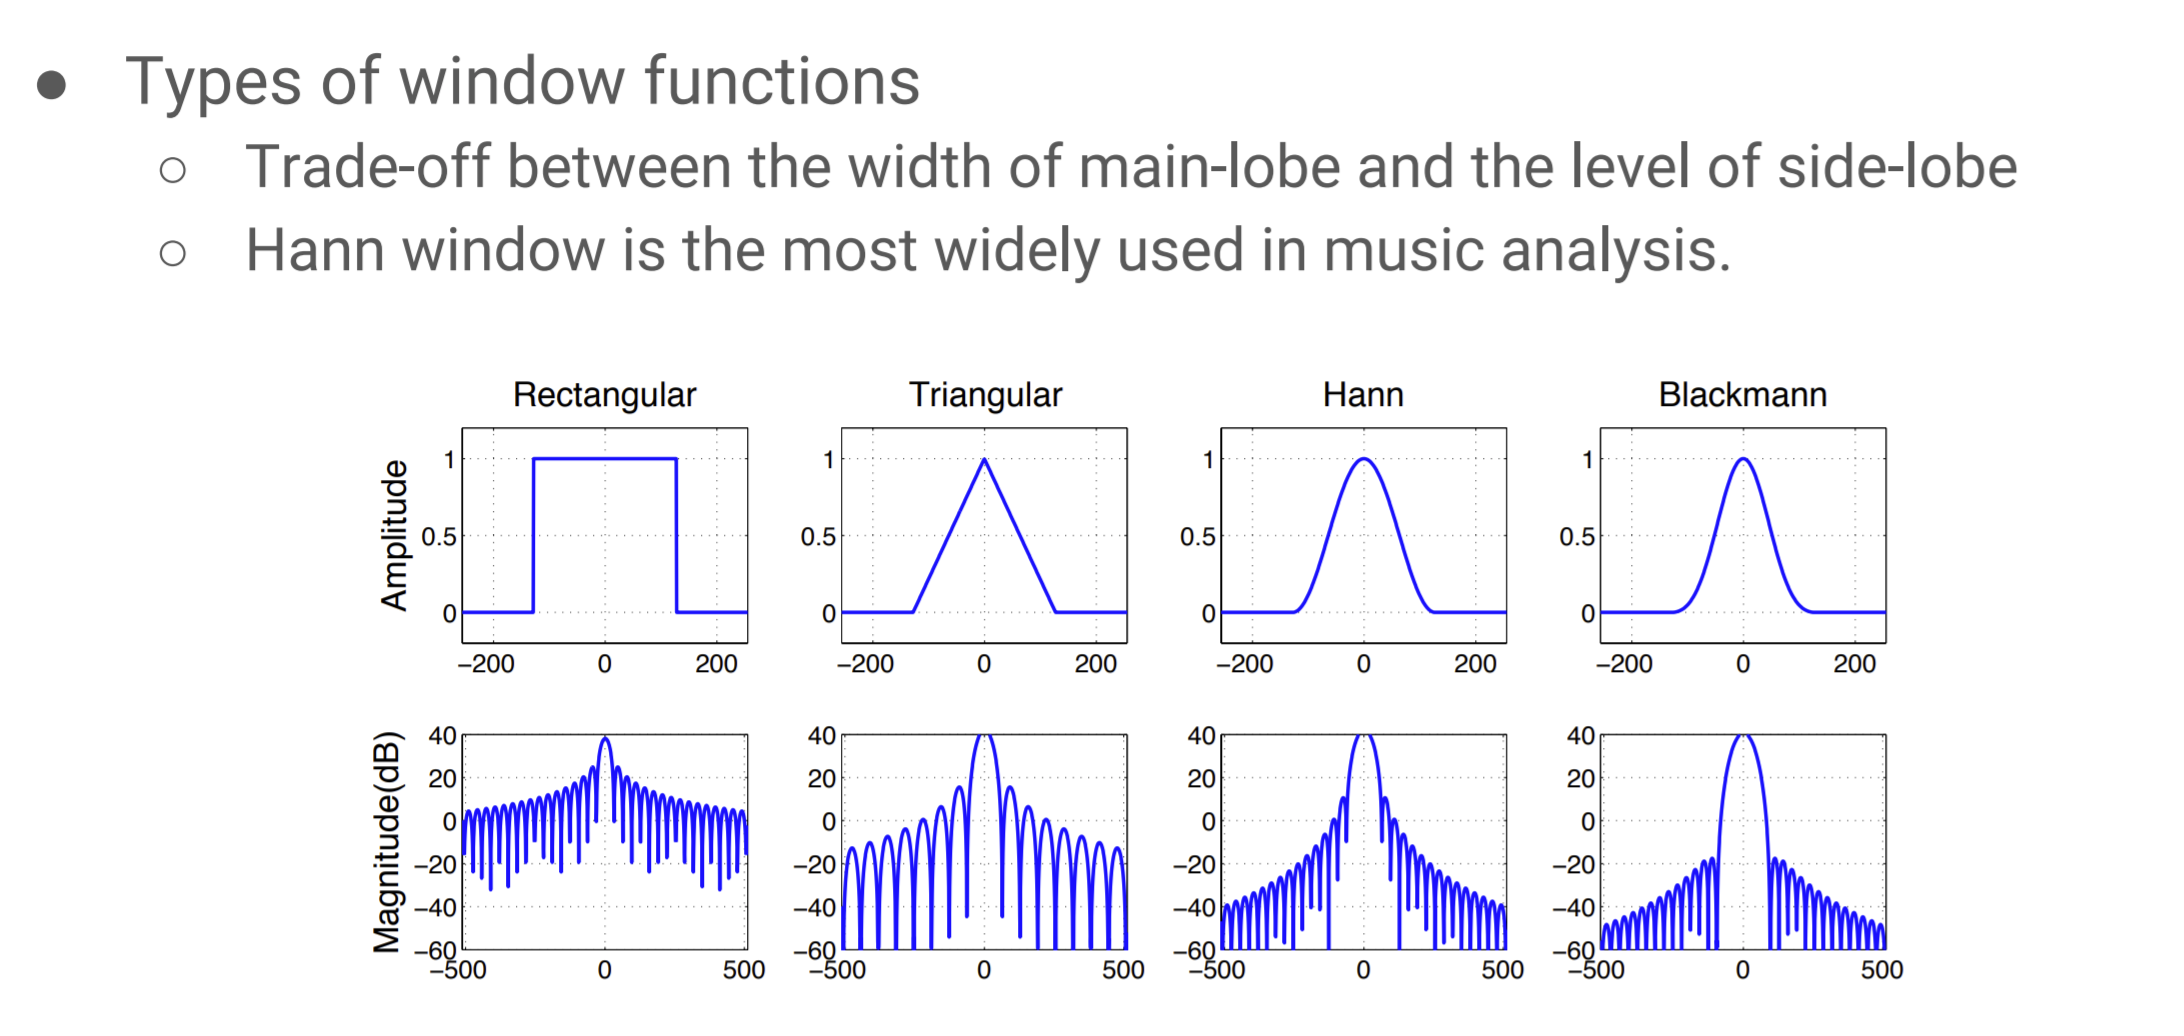

In [ ]:
X = librosa.stft(audio)

In [ ]:
X

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X)

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X, sr=sr, x_axis='time', y_axis='hz') # spectrogram 보여주는 그래프

In [ ]:
x = librosa.amplitude_to_db(abs(X))

In [ ]:
X = librosa.stft(audio,n_fft=4096, hop_length=None, win_length=None,)
Xdb = librosa.amplitude_to_db(abs(X)) # Convert an amplitude spectrogram to dB-scaled spectrogram. (데시벨 스케일)
# abs() : magnitude만 남음
# angle() : phaze 만 남음
# amplitude : 진폭

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(X,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [ ]:
# istft
# Inverse short-time Fourier transform (ISTFT).
# librosa.istft(stft_matrix, hop_length=None, win_length=None, window='hann', center=True, dtype=None, length=None)
# In general, window function, hop length and other parameters should be same as in stft, which mostly leads to perfect
# reconstruction of a signal from unmodified stft_matrix.

# X = librosa.stft(audio)
Y_hat = librosa.istft(X)

In [ ]:
plt.plot(Y_hat)

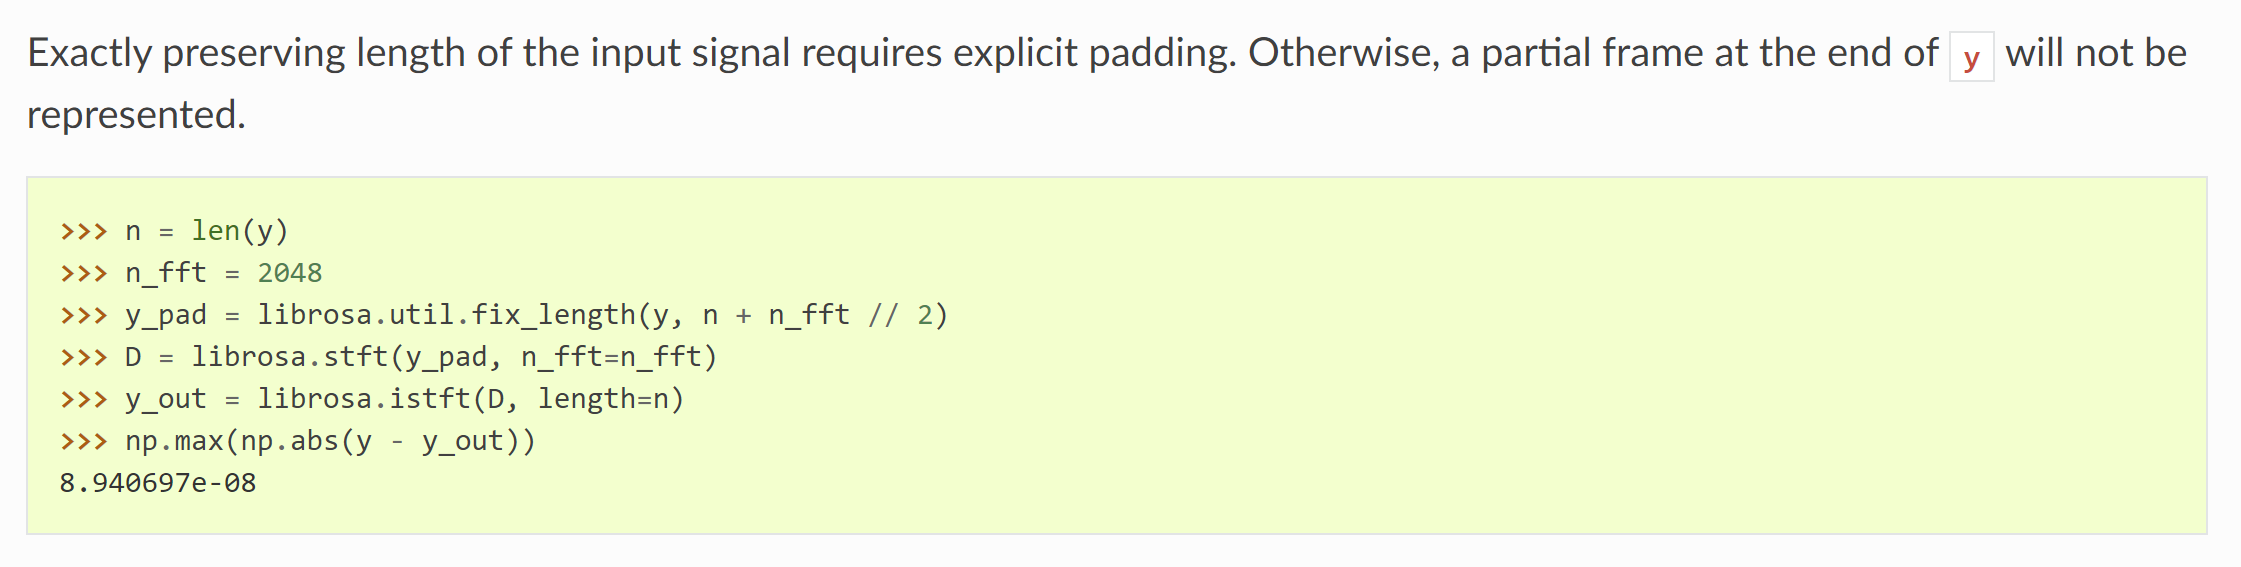

In [ ]:
mel_X = librosa.feature.melspectrogram(y=audio, sr=sr,n_mels=128,
                                    fmax=8000)

In [ ]:
mel_X

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mel_X), sr=sr, x_axis='time', y_axis='mel')
# power_to_db() : Convert a power spectrogram (amplitude squared) to decibel (dB) units

In [ ]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(mel_X, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')